In [1]:
!pip install tensorflow==2.0.0b1

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
split_time = 1300

In [5]:
dataset = pd.read_csv('/content/gdrive/My Drive/Google Colab/PredictStockPrice/data/stock_data_MWG.csv')
training_set = dataset.iloc[:split_time, 7:8].values
len(dataset)

1505

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
no_of_sample = len(training_set)
no_of_sample

1300

In [8]:
for i in range(60, no_of_sample):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [10]:
# Xay dung model LSTM
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [11]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Train on 1240 samples
Epoch 1/50
1240/1240 [==============================] - 5s 4ms/sample - loss: 0.0312
Epoch 2/50
1240/1240 [==============================] - 4s 3ms/sample - loss: 0.0040
Epoch 3/50
1240/1240 [==============================] - 4s 3ms/sample - loss: 0.0036
Epoch 4/50
1240/1240 [==============================] - 4s 3ms/sample - loss: 0.0030
Epoch 5/50
1240/1240 [==============================] - 4s 3ms/sample - loss: 0.0028
Epoch 6/50
1240/1240 [==============================] - 4s 3ms/sample - loss: 0.0029
Epoch 7/50
1240/1240 [==============================] - 4s 3ms/sample - loss: 0.0027
Epoch 8/50
1240/1240 [==============================] - 4s 3ms/sample - loss: 0.0028
Epoch 9/50
1240/1240 [==============================] - 4s 3ms/sample - loss: 0.0028
Epoch 10/50
1240/1240 [==============================] - 4s 3ms/sample - loss: 0.0028
Epoch 11/50
1240/1240 [==============================] - 4s 3ms/sample - loss: 0.0027
Epoch 12/50
1240/1240 [==================

In [12]:
dataset_test = dataset.iloc[split_time:]
real_stock_price = dataset_test.iloc[:, 7:8].values
real_stock_price.shape
# Tien hanh du doan
dataset_total = dataset.iloc[:,7:8]
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


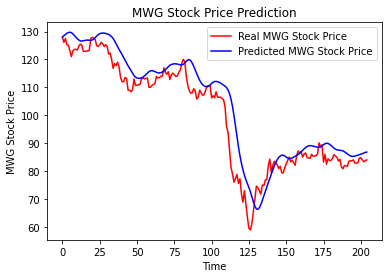

Stock price 23/07/2020 of MWG :  86.90003
Stock price 24/07/2020 of MWG :  87.07312
Stock price 25/07/2020 of MWG :  87.363594
Stock price 26/07/2020 of MWG :  87.76896
Stock price 27/07/2020 of MWG :  88.26813
Stock price 28/07/2020 of MWG :  88.83502
Stock price 29/07/2020 of MWG :  89.446175
Stock price 30/07/2020 of MWG :  90.08352


In [13]:
# Ve bieu do gia that va gia du doan
plt.plot(real_stock_price, color = 'red', label = 'Real MWG Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted MWG Stock Price')
plt.title('MWG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MWG Stock Price')
plt.legend()
plt.show()




dataset_test = dataset_test['Dongcua'][len(dataset_test)-60:len(dataset_test)].to_numpy()
dataset_test = np.array(dataset_test)

inputs = dataset_test
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


i = 23
while i<31:
    X_test = []
    no_of_sample = len(dataset_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = regressor.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Them ngay hien tai vao
    dataset_test = np.append(dataset_test, predicted_stock_price[0], axis=0)
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)

    print('Stock price ' + str(i) + '/07/2020 of MWG : ', predicted_stock_price[0][0])
    i = i +1

Time-Series Forecasting: Predicting Stock Prices Using Facebook’s Prophet Model

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("/content/gdrive/My Drive/Google Colab/PredictStockPrice/data/stock_data_MWG.csv") 
data.head(5)

,Unnamed: 0,GDthoathuan,Giathamchieu,Mocua,Thapnhat,Nuocngoaiban,Khoiluong,Dongcua,Giatri,Thaydoi,Nuocngoaimua,Thaydoiphantram,Caonhat,Ngay
0,29,0,13.57,13.49,13.49,0,"10,660",13.57,0,0.00,960,0%,13.57,2014-07-14
1,28,"100,000",13.57,14.49,14.49,0,"13,480",14.49,0,0.92,"2,550",6.78%,14.49,2014-07-15
2,27,"500,000",14.49,15.49,15.49,0,"17,290",15.48,0,0.99,"3,490",6.83%,15.49,2014-07-16
3,26,0,15.48,16.56,16.56,0,"95,120",16.57,0,1.09,"84,660",7.04%,16.56,2014-07-17
4,155,0,16.57,17.65,17.65,0,"134,460",17.65,0,1.08,"98,070",6.52%,17.65,2014-07-18


In [16]:
data.describe()

,Unnamed: 0,Giathamchieu,Mocua,Thapnhat,Dongcua,Giatri,Thaydoi,Caonhat
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.0,1505.000000,1505.000000
mean,777.202658,64.847236,64.873535,64.141980,64.894033,0.0,0.046797,65.648591
std,435.925955,30.601319,30.566005,30.285723,30.576693,0.0,1.391432,30.862042
min,0.000000,13.570000,13.490000,13.490000,13.570000,0.0,-7.200000,13.570000
25%,402.000000,30.290000,30.110000,29.720000,30.290000,0.0,-0.530000,30.470000
50%,778.000000,72.580000,72.500000,71.700000,72.720000,0.0,0.000000,73.450000
75%,1154.000000,86.540000,86.900000,85.830000,86.540000,0.0,0.620000,87.620000
max,1530.000000,128.000000,129.000000,127.400000,128.000000,0.0,6.320000,129.500000


In [17]:
!pip install fbprophet

In [18]:
# Select only the important features i.e. the date and price
data = data[["Ngay","Dongcua"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Ngay":"ds","Dongcua":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2014-07-14,13.57
1,2014-07-15,14.49
2,2014-07-16,15.48
3,2014-07-17,16.57
4,2014-07-18,17.65


In [19]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


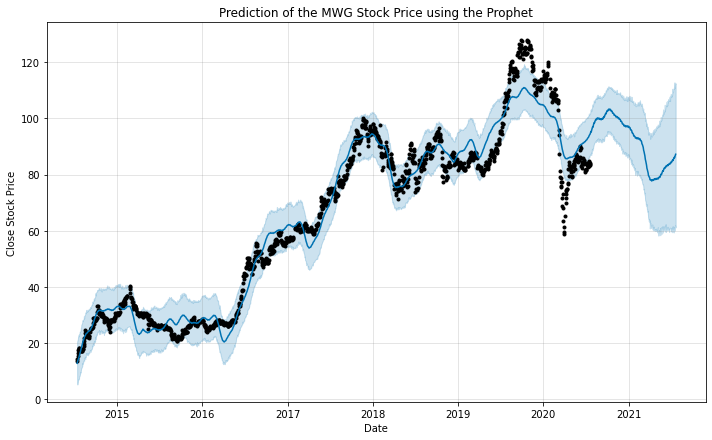

In [21]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the MWG Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

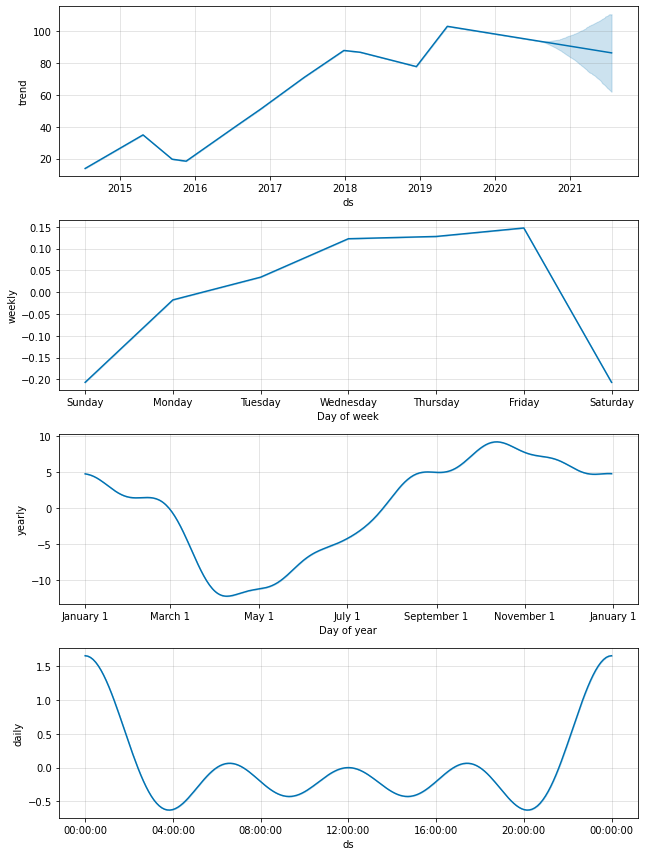

In [22]:
m.plot_components(prediction)
plt.show()